# 🧠🤖 Treinamento de Redes Convolucionais

- **Deadline**: 27/07/2025
- **Entrega**: O trabalho deve ser entregue via sistema Testr.
- **Pontuação**: 5 pontos (+1 ponto extra).
- O trabalho deve ser realizado individualmente.



## Especificação


### Contexto

O trabalho consiste em realizar o treinamento de redes neurais convolucionais na base de dados [Chest X-ray Image (COVID19, PNEUMONIA, and NORMAL) disponível no kaggle](https://www.kaggle.com/datasets/alsaniipe/chest-x-ray-image). Esta base de dados contém exames de raio-x de pacientes saudáveis, com pneumonia e com covid19. O objetivo do trabalho é treinar uma rede neural capaz de identificar se o raio-x pertence a uma pessoa saudável ou com uma das duas doenças.




### Regras

- Devem ser treinadas 3 redes neurais, uma customizada (desenvolvida pelo aluno), uma pré-treinada com parte convolucional congelada e uma pré-treinada  treinada totalmente (*fine-tuning*).
- O dataset provê conjuntos de treino e teste. O conjunto de treino deve ser dividido em
- O código deve ser preparado para utilizar GPUs (no colab ou localmente).
- Não devem ser utilizados frameworks de alto nível como keras ou lightning. O código deve utilizar apenas pytorch.
- Deve ser utilizado data augmentation (o aluno tem liberdade para escolher os métodos que fizerem sentido para a tarefa).
- Ao final, deve ser apresentados gráficos comparando as acurácias de treino e validação ao longo das épocas e uma tabela apresentando as métricas de performance revocação, f1-score e acurácia para o conjunto de teste em cada configuração de rede neural. Além disso, deve ser uma análise qualitativa dos casos de falha.
- Por fim, deve ser escrito um texto curto descrevendo e discutindo os resultados. Deve ser explicado com as suas palavras o que as métricas indicam (e.g., o que quer dizer um recall alto para pneumonia, se isto acontecer), se aconteceu overfitting ou se o modelo alcançou uma boa generalização, se os valores das métricas foram satisfatórios, prováveis causas para as falhas e sugestões de como melhorar a performance.



### Pontos Extras

- Receberá um ponto extra, o aluno que utilizar um método explainability (e.g., [gradcam++](https://github.com/jacobgil/pytorch-grad-cam)) para mostrar as regiões que mais influenciaram a decisão da rede neural.


### Dicas de Implementação

- **Download dos dados**: use a biblioteca `kagglehub` para fazer o download do dataset no colab.

- **Criação do dataset**: o pytorch possui a função [ImageFolder](https://debuggercafe.com/pytorch-imagefolder-for-training-cnn-models/) que torna mais simples a criação de datasets organizados no formato do dataset utilizado no trabalho.

- **Leitura e preprocessamento das Imagens**: As imagens do dataset possuem características bastante diversas, com algumas delas sendo armazenadas em tons de cinza e outras em RGB, algumas são arquivos BITMAP armazenados em formato jpg, algumas usam 8 bits e outras 16 bits para representar pixels e as resoluções das imagens são altamente diferentes. Use a função abaixo para ler as imagens e lembre-se de realizar *resize* para o tamanho esperado pela rede neural.

```python
from PIL import Image

def load_img(path):
  # Le a imagem em diversos formatos e garante que a imagem tenha 3 canais
  img = Image.open(path).convert('RGB')
  # converte para um tensor do pytorch
  img = v2.functional.to_image(img)
  # garante que seja uma imagem de 8 bits reescalando os valores adequadamente
  img = v2.functional.to_dtype(img, dtype=torch.uint8, scale=True)
  return img
```

- **Aumento de Dados**: Para visualizar a maioria das transformações disponíveis, veja [este site](https://docs.pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html). Use a versão `v2` do pacote `pytorch.transforms`. Veja [este link](https://docs.pytorch.org/vision/main/transforms.html#v2-api-reference-recommended) para uma explicação do porquê e instruções de uso.
  - ⚠️**IMPORTANTE**⚠️: o aumento de dados deve ser aplicado apenas no conjunto de treinamento para aumentar a diversidade dos dados. Os dados de validação e teste devem ser **puros e não modificados**, exceto por operações como resize ou normalização.


- **Seleção de um modelo pré-treinado**: É uma boa idéia experimentar com diferentes modelos pré-treinados para avaliar qual vai levar a predições mais corretas e avaliar outros critérios, por exemplo, tempo de forward por imagem. Uma heurística para escolher modelos é buscar aqueles que possuem [melhor performance na base de dados ImageNet](https://docs.pytorch.org/vision/0.21/models.html#table-of-all-available-classification-weights:~:text=Table%20of%20all%20available%20classification%20weights).
  - As redes mobilenet-v2 e -v3 são desenhadas para serem rápidas e rodarem em dispositivos de baixo poder computacional.
  - A rede densenet em geral entrega boa performance.
  - As Efficientnet-b5+ não rodam no colab (até a última vez que testei) por falta de memória.
  - As redes ViT usam a arquitetura transformers e não são convolucionais. **Elas podem ser utilizadas para comparação, mas pelo menos uma outra rede neural totalmente convolucional deve ser utilizada**.

- **Visualize sempre que possível**: Não deixe de visualizar pelo menos uma vez os batches que estão sendo usados para treinar a rede. Alguma operação pode estar transformando as imagens de forma que a impedir que a rede neural seja capaz de aprender os padrões que ela deveria aprender.

- **Brinque com Hiperparâmetros**: Ajuste os hiperparâmetros para tentar chegar em modelos com o máximo de performance de validação. Não é obrigatório, mas é legal brincar também com técnicas de regularização, caso a rede esteja sofrendo de overfitting.

- **Desbalanceamento do Dataset**: O dataset possui algum nível de desbalanceamento, com mais imagens normais do que com covid ou pneumonia. Não é obrigatório, mas quem quiser pode realizar superamostragem dos dados com covid ou pneumonia para mitigar o desbalanceamento. As operações de data augmentation vão garantir que os dados tenham diversidade.


- **Escrita de tabelas**: Tabelas podem ser escritas em notebooks usando latex, como indicado abaixo.

```latex
\begin{array}{ccc}
\hline
modelo & métrica1 & métrica2 \\ \hline
custom & 0.85 & 0.83 \\ \hline
frozen-conv & 0.91 & 0.92 \\ \hline
fine-tuning & 0.93 & 0.90 \\ \hline
\end{array}
```

O resultado seria:

\begin{array}{ccc}
\hline
modelo & métrica1 & métrica2 \\ \hline
custom & 0.85 & 0.83 \\ \hline
frozen-conv & 0.91 & 0.92 \\ \hline
fine-tuning & 0.93 & 0.90 \\ \hline
\end{array}

Elas também pode ser escritas em markdown como indicado abaixo:

```markdown
| modelo | métrica1 | métrica2 |
|---|---|---|
| custom | 0.85 | 0.83 |
| frozen-conv | 0.91 | 0.92 |
| fine-tuning | 0.93 | 0.90 |
```

O resultado seria:

| modelo | métrica1 | métrica2 |
|---|---|---|
| custom | 0.85 | 0.83 |
| frozen-conv | 0.91 | 0.92 |
| fine-tuning | 0.93 | 0.90 |


### Roteiro de Implementação

Para realizar o trabalho, siga os seguintes passos:

1. Faça o download automático do dataset.
1. Compreenda a organização do dataset e visualize alguns dados.
1. Crie os dataset de treino, validação e teste do pytorch. Visualize se os dados continuam com a mesma cara.
1. Crie as transformações de data augmentation e adicione ao dataset de treino.
1. Crie transformações para os datasets de validação e teste que coloquem os dados no mesmo formato usado no treino, por exemplo, resize e normalização. Lembre-se de **NÃO** aplicar data augmentation nos conjuntos de validação e teste!
1. Crie dataloaders.
1. Construa uma CNN.
1. Escreva funções para treinamento e avaliação. Retorne o valor da acurácia para os conjuntos de treino e validação nas épocas de treinamento.
1. Crie uma loss function e um otimizador.
1. Execute o treinamento e verifique se a curva de treinamento está se comportando como esperado.
  - A acurácia de treinamento está aumentando? Se não, verifique se o dataset está certo e aumente a capacidade da rede.
  - A acurácia de treinamento se aproximando de 100%? Se não, aumente a capacidade da rede e tente ajustar a learning rate.
  - A acurácia de validação está aumentando no início do treinamento? Se não, verifique se os dados de validação estão no mesmo formato dos dados de treinamento.
  - A acurácia de validação está diminuindo depois de um número de épocas? Parece que está acontecendo overfitting. Tente usar algum método de regularização.  
1. Brinque com os hiperparâmetros para tentar fazer a rede aprender mais rápido e com maior performance de validação.
1. Crie uma função para calcular métricas de avaliação e visualize as métricas para os conjuntos de treinamento e teste. Compare os dois e veja se aconteceu overiffitting.

Repita o processo usando as redes pré-treinadas.



In [1]:
# !pip install kagglehub
# !pip install polars
# !pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu118
# !pip install pandas matplotlib seaborn
# !pip install kaggle Pillow
# !pip install tensorboard

In [2]:
import kagglehub
import os

base_dataset_path = "/home/hygo2025/Documents/datasets"
os.environ['KAGGLEHUB_CACHE'] = base_dataset_path
base_dir = kagglehub.dataset_download("alsaniipe/chest-x-ray-image")
base_dir = f"{base_dir}/Data"

In [3]:
import os

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

### Organização do dataset

In [4]:
for dataset_type, dataset_dir in [('Treino', train_dir), ('Teste', test_dir)]:
    covid_path = os.path.join(dataset_dir, 'COVID19')
    normal_path = os.path.join(dataset_dir, 'NORMAL')
    pneumonia_path = os.path.join(dataset_dir, 'PNEUMONIA')

    num_covid = len(os.listdir(covid_path))
    num_normal = len(os.listdir(normal_path))
    num_pneumonia = len(os.listdir(pneumonia_path))

    print(f"Conjunto de {dataset_type}:")
    print(f"  - Imagens com Covid: {num_covid}")
    print(f"  - Imagens Normais: {num_normal}")
    print(f"  - Imagens com Pneumonia: {num_pneumonia}")
    print(f"  - Total: {num_normal + num_pneumonia}\n")

Conjunto de Treino:
  - Imagens com Covid: 460
  - Imagens Normais: 1266
  - Imagens com Pneumonia: 3418
  - Total: 4684

Conjunto de Teste:
  - Imagens com Covid: 116
  - Imagens Normais: 317
  - Imagens com Pneumonia: 855
  - Total: 1172



### Visualizando alguns dados

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def plot_samples(category_name, image_path, num_samples=5):
    plt.figure(figsize=(12, 4))
    image_files = os.listdir(image_path)[:num_samples]

    for i, file_name in enumerate(image_files):
        img = Image.open(os.path.join(image_path, file_name))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{category_name} {i+1}")
        plt.axis('off')
    plt.show()


#### Imagens normais

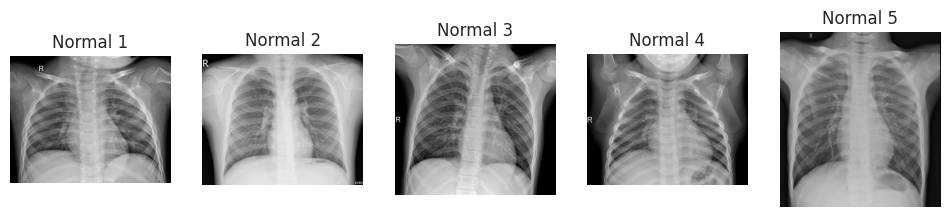

In [6]:
plot_samples('Normal', os.path.join(train_dir, 'NORMAL'))

#### Imagens com covid

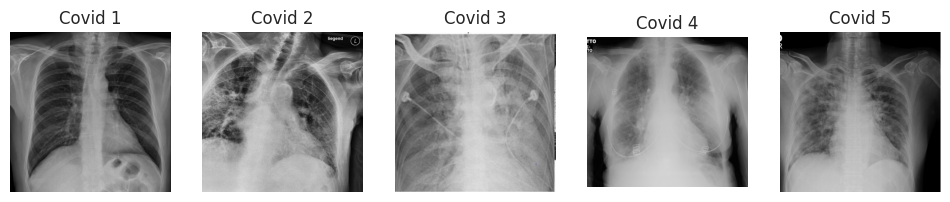

In [7]:
plot_samples('Covid', os.path.join(train_dir, 'COVID19'))

#### Imagens pneumonia

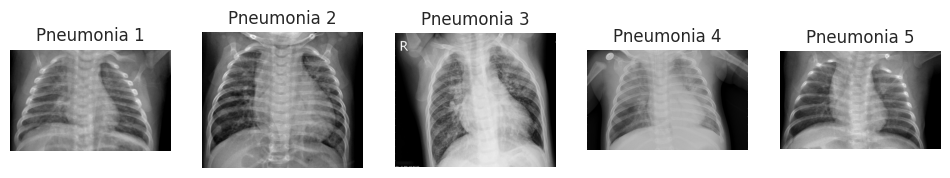

In [8]:
plot_samples('Pneumonia', os.path.join(train_dir, 'PNEUMONIA'))

### Pre-processando as imagens

Ao tentar rodar diretamente aplicando as transformacoes das imagens ficou muito lento, vou salvar as imagens preprocessadas dai vai ficar mais rapido as outras execucoes

In [9]:
import os
import torch
from PIL import Image
from torchvision.transforms import v2
from tqdm import tqdm

def load_img(path):
    img = Image.open(path).convert('RGB')
    img = v2.functional.to_image(img)
    img = v2.functional.to_dtype(img, dtype=torch.uint8, scale=True)
    return img

def preprocess_dataset(source_base_dir: str, target_base_dir: str, target_size: int = 256):
    resize_transform = v2.Resize((target_size, target_size))

    print(f"Iniciando pré-processamento de '{source_base_dir}' para '{target_base_dir}'...")

    for split in ['train', 'val', 'test']:
        source_dir = os.path.join(source_base_dir, split)
        target_dir = os.path.join(target_base_dir, split)

        if not os.path.isdir(source_dir):
            print(f"Aviso: Diretório fonte '{source_dir}' não encontrado, pulando.")
            continue

        all_paths = [
            os.path.join(dirpath, filename)
            for dirpath, _, filenames in os.walk(source_dir)
            for filename in filenames
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))
        ]

        if not all_paths:
            print(f"Nenhuma imagem encontrada em '{source_dir}', pulando.")
            continue

        print(f"\nVerificando e processando o conjunto: {split}")

        for img_path in tqdm(all_paths, desc=f"Processando {split}"):
            relative_path = os.path.relpath(img_path, source_dir)
            target_img_path = os.path.join(target_dir, os.path.splitext(relative_path)[0] + '.png')

            if os.path.exists(target_img_path):
                continue

            try:
                os.makedirs(os.path.dirname(target_img_path), exist_ok=True)

                img_tensor = load_img(img_path)
                img_resized = resize_transform(img_tensor)

                pil_img = v2.functional.to_pil_image(img_resized)
                pil_img.save(target_img_path)

            except Exception as e:
                print(f"Erro ao processar a imagem {img_path}: {e}")

    print("\nPré-processamento concluído!")

In [10]:
target_base_dir = f"{base_dataset_path}/processed"
preprocess_dataset(
    source_base_dir=base_dir,
    target_base_dir=target_base_dir,
    target_size=256
)

Iniciando pré-processamento de '/home/hygo2025/Documents/datasets/datasets/alsaniipe/chest-x-ray-image/versions/1/Data' para '/home/hygo2025/Documents/datasets/processed'...

Verificando e processando o conjunto: train


Processando train: 100%|██████████| 5144/5144 [00:00<00:00, 113055.44it/s]


Aviso: Diretório fonte '/home/hygo2025/Documents/datasets/datasets/alsaniipe/chest-x-ray-image/versions/1/Data/val' não encontrado, pulando.

Verificando e processando o conjunto: test


Processando test: 100%|██████████| 1288/1288 [00:00<00:00, 108888.06it/s]


Pré-processamento concluído!


### Criação dos datasets

#### Carregando os datasets

In [11]:
import torchvision.transforms as v2
import torchvision.datasets as datasets

IMG_SIZE = 224

transform = v2.Compose([
    v2.Resize((IMG_SIZE, IMG_SIZE)),
    v2.ToTensor()
])

train_dataset_normal = datasets.ImageFolder(train_dir, transform=transform)
test_dataset_normal = datasets.ImageFolder(test_dir, transform=transform)

print(f"Treino: {len(train_dataset_normal)} imagens.")
print(f"Teste: {len(test_dataset_normal)} imagens.")

print(f"Classes: {train_dataset_normal.class_to_idx}")

Treino: 5144 imagens.
Teste: 1288 imagens.
Classes: {'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}


#### Criando os dataloaders

In [12]:
import torch


BATCH_SIZE = 32

train_loader = torch.utils.data.DataLoader(train_dataset_normal, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset_normal, batch_size=BATCH_SIZE, shuffle=False)

#### Verificando se os dados continuam com a mesma cara.

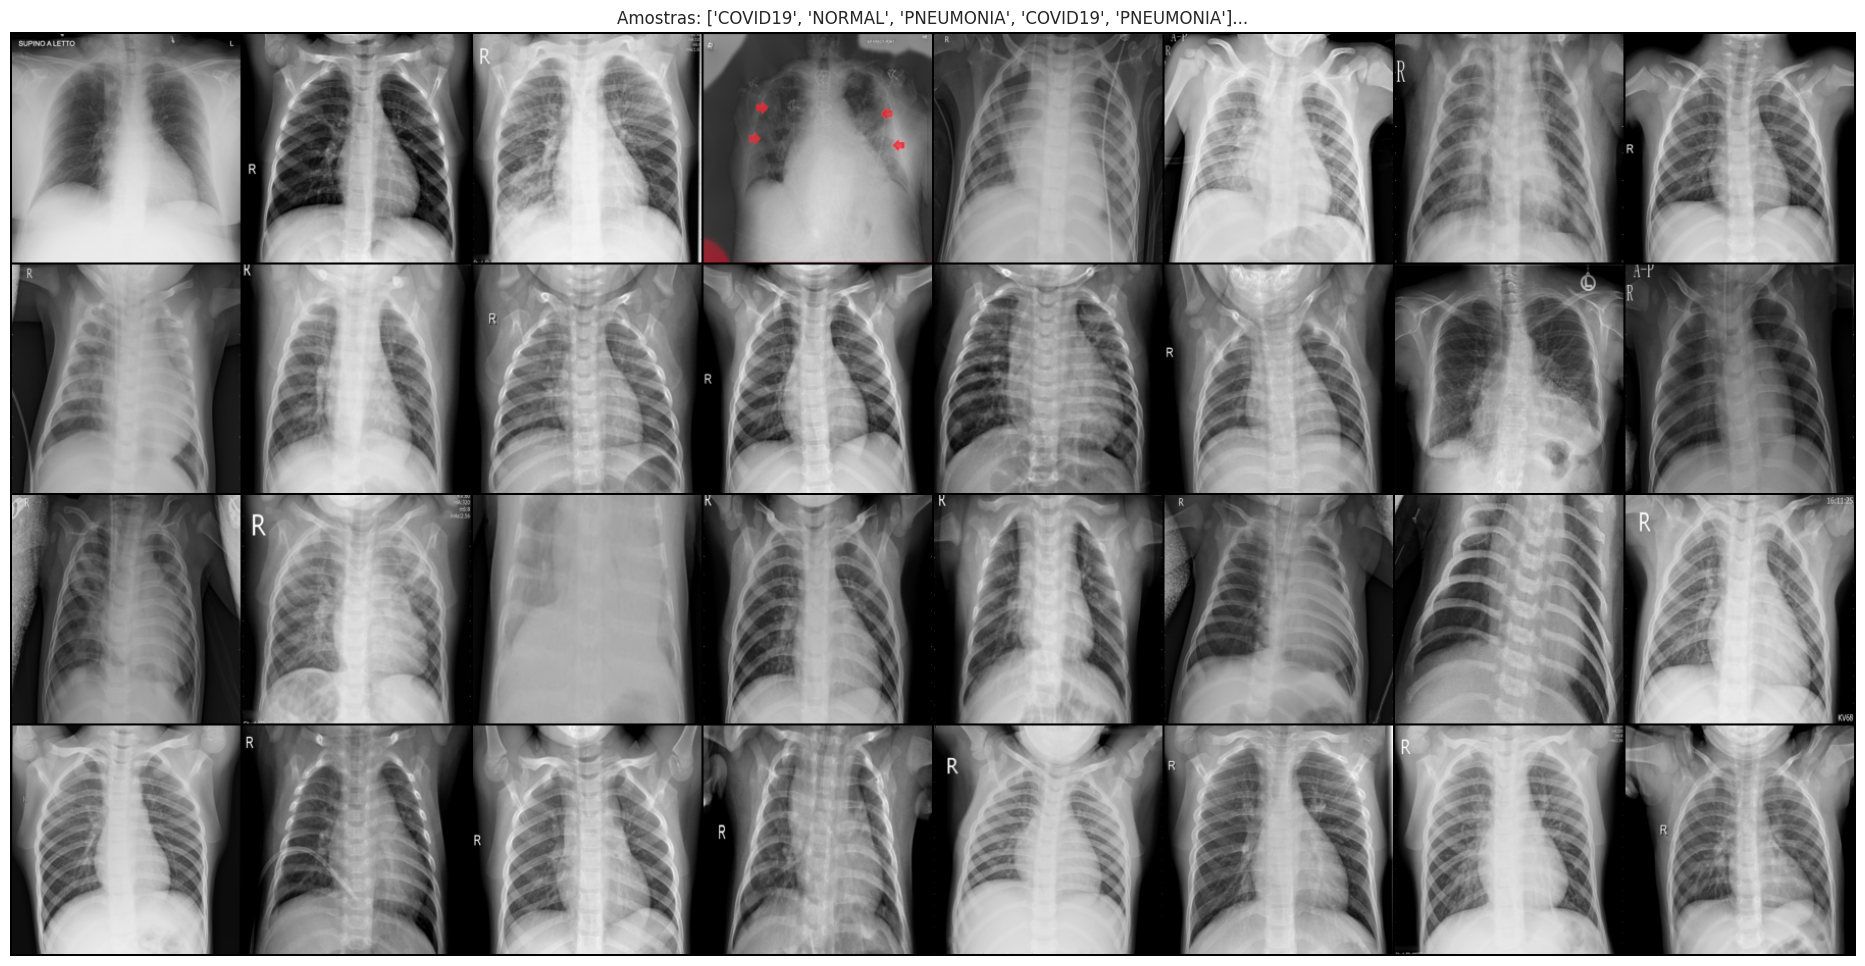

In [13]:
import torchvision
import matplotlib.pyplot as plt

def imshow(grid_imgs, title=""):
    grid_imgs = grid_imgs.numpy().transpose((1, 2, 0))
    plt.imshow(grid_imgs, cmap='gray')
    plt.title(title, fontsize=12)
    plt.axis('off')

class_names = train_dataset_normal.classes
imgs, labels = next(iter(train_loader))

plt.figure(figsize=(24,12))
imshow(
    grid_imgs=torchvision.utils.make_grid(imgs),
    title=f"Amostras: {[class_names[x] for x in labels][:5]}..."
)
plt.show()

### Data augmentation

#### Transforms

In [14]:
from torchvision.transforms import v2

train_transforms = v2.Compose([
    v2.RandomCrop(size=(IMG_SIZE, IMG_SIZE)),

    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomRotation(10),
    v2.ColorJitter(brightness=0.2, contrast=0.2),

    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

test_transforms = v2.Compose([
    v2.RandomCrop(size=(IMG_SIZE, IMG_SIZE)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

#### Carregando novamente os datasets com data augmentation

In [15]:
train_dataset_aug = datasets.ImageFolder(os.path.join(target_base_dir, 'train'), transform=train_transforms)
test_dataset_aug = datasets.ImageFolder(os.path.join(target_base_dir, 'test'), transform=test_transforms)

print(f"Treino: {len(train_dataset_aug)}")
print(f"Teste: {len(test_dataset_aug)}")

Treino: 5144
Teste: 1288


#### Carregando novamente os dataloaders

In [16]:
import torch

if torch.cuda.is_available():
    print("CUDA está disponível! Treinamento usará a GPU.")
    print("Dispositivo CUDA:", torch.cuda.get_device_name(0))
    print("Versão do PyTorch:", torch.__version__)
    print("Versão do CUDA que o PyTorch foi compilado:", torch.version.cuda)
else:
    print("CUDA NÃO está disponível. Treinamento usará a CPU.")



CUDA está disponível! Treinamento usará a GPU.
Dispositivo CUDA: NVIDIA GeForce RTX 4090
Versão do PyTorch: 2.7.1+cu118
Versão do CUDA que o PyTorch foi compilado: 11.8


In [17]:
BATCH_SIZE = 512
NUM_WORKERS = 18

train_loader_aug = torch.utils.data.DataLoader(train_dataset_aug, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
test_loader_aug = torch.utils.data.DataLoader(test_dataset_aug, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)

In [18]:
import time

print("Iniciando benchmark do DataLoader...")
start_time = time.time()

for batch in train_loader_aug:
    pass

end_time = time.time()
print(f"Tempo para percorrer todo o DataLoader: {end_time - start_time:.2f} segundos.")

Iniciando benchmark do DataLoader...
Tempo para percorrer todo o DataLoader: 4.26 segundos.


#### Verificando se os dados

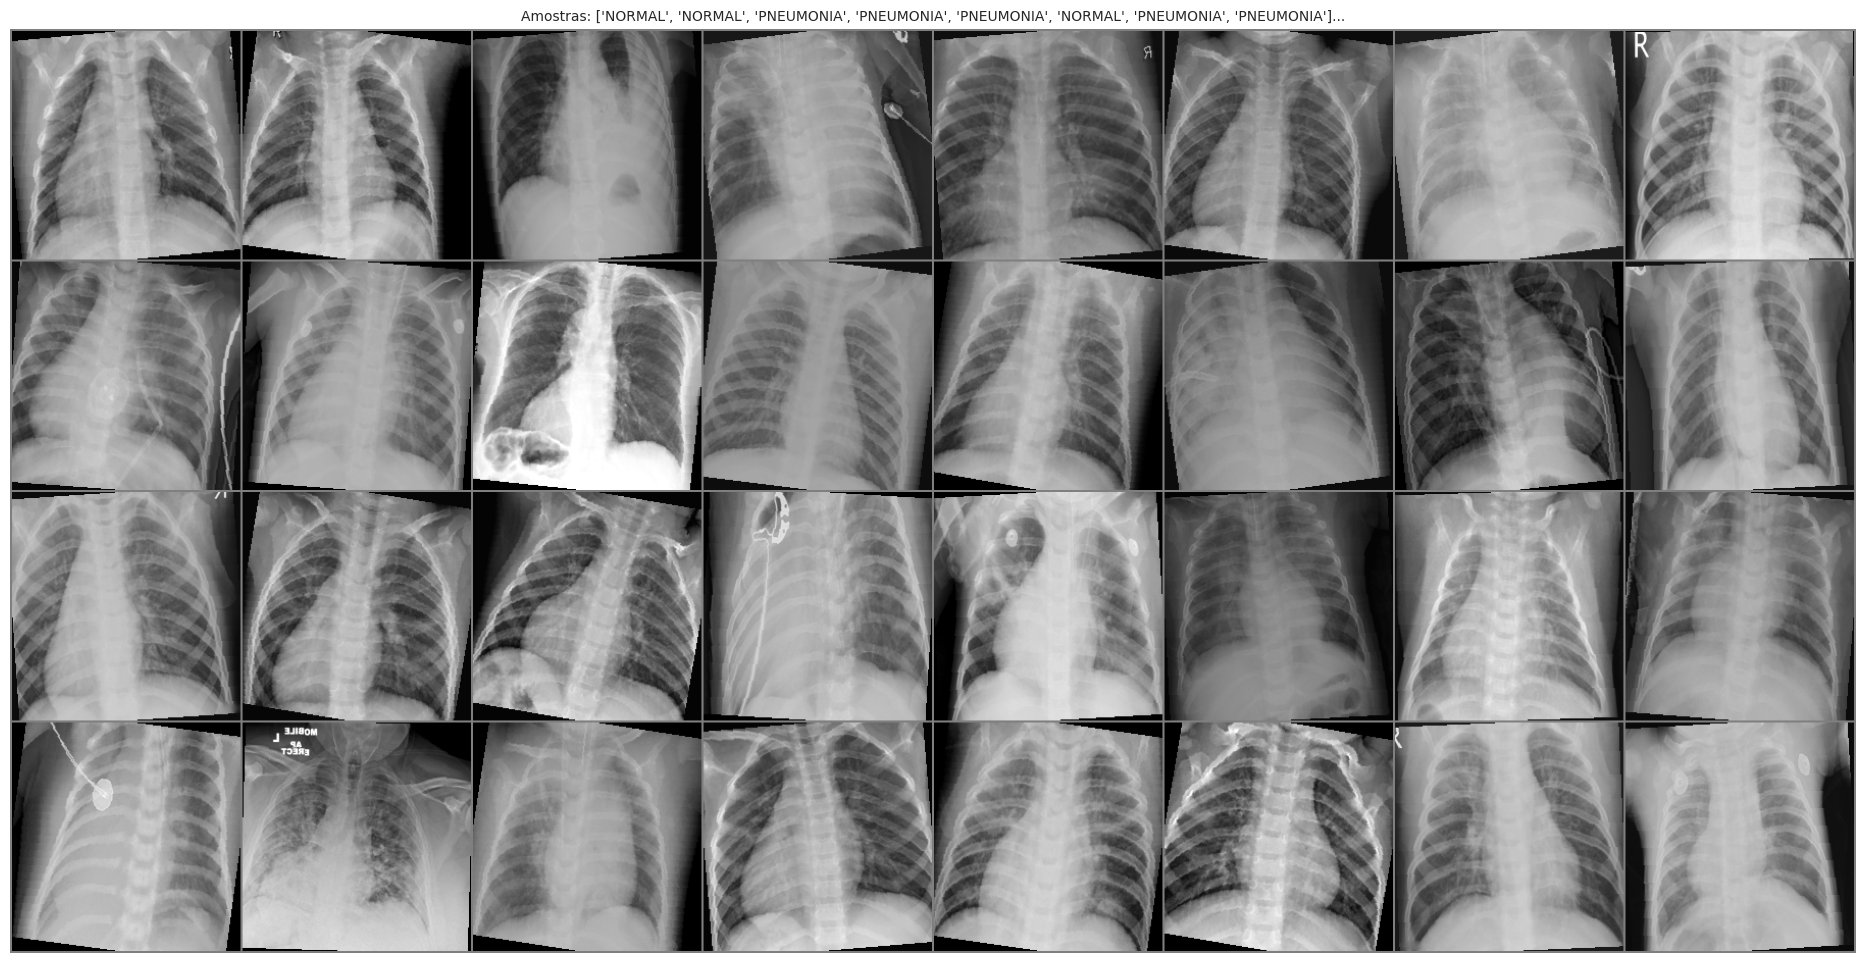

In [19]:
import numpy as np
import torchvision
import matplotlib.pyplot as plt

class_names = train_dataset_normal.classes
imgs, labels = next(iter(train_loader_aug))

def imshow_normalized(grid_imgs, title=""):
    grid_imgs = grid_imgs.numpy().transpose((1, 2, 0))
    mean = np.array([0.5])
    std = np.array([0.5])
    grid_imgs = std * grid_imgs + mean
    grid_imgs = np.clip(grid_imgs, 0, 1) # Garante que os valores fiquem entre 0 e 1
    plt.imshow(grid_imgs, cmap='gray')
    plt.title(title, fontsize=10)
    plt.axis('off')

num_images_to_show = 32
images_to_show = imgs[:num_images_to_show]
labels_to_show = labels[:num_images_to_show]

plt.figure(figsize=(24,12))
imshow_normalized(
    grid_imgs=torchvision.utils.make_grid(images_to_show, nrow=8),
    title=f"Amostras: {[class_names[x] for x in labels_to_show[:8]]}..."
)
plt.show()


### Criando uma CNN

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class SimpleCNN(nn.Module):
    def __init__(self, num_classes=3):
        super().__init__()
        self.printed = False
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(in_features=64 * 28 * 28, out_features=512)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool3(x)

        if not self.printed:
            self.printed = True
            print("Shape do tensor antes do flatten:", x.shape)
            print("[batch_size, canais, altura, largura] - multiplicar tudo, exceto o batch_size")

        x = torch.flatten(x, 1) # Achata todas as dimensões, exceto o lote

        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x

    def embedding(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))

        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = F.relu(x)

        return x


In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando o dispositivo: {device}")

Usando o dispositivo: cuda


In [22]:
model = SimpleCNN(num_classes=3)

In [23]:
model.to(device)
model = torch.compile(model)

In [24]:
dummy_input = torch.randn(1, 3, 224, 224).to(device)

output = model(dummy_input)

print("--- Teste de Dimensões ---")
print(f"Shape do dado de entrada: {dummy_input.shape}")
print(f"Shape do dado de saída: {output.shape}")
print(f"Saída (logits): {output}")

Shape do tensor antes do flatten: torch.Size([1, 64, 28, 28])
[batch_size, canais, altura, largura] - multiplicar tudo, exceto o batch_size
--- Teste de Dimensões ---
Shape do dado de entrada: torch.Size([1, 3, 224, 224])
Shape do dado de saída: torch.Size([1, 3])
Saída (logits): tensor([[ 0.0433,  0.0932, -0.1264]], device='cuda:0',
       grad_fn=<CompiledFunctionBackward>)


/home/hygo2025/miniconda3/envs/trabalho2/lib/python3.12/site-packages/torch/_inductor/compile_fx.py:236: UserWarning: TensorFloat32 tensor cores for float32 matrix multiplication available but not enabled. Consider setting `torch.set_float32_matmul_precision('high')` for better performance.
  warnings.warn(


In [25]:
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import time

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)

experiment_name = f"SimpleCNN_LR_001_{int(time.time())}"
writer = SummaryWriter(log_dir=f"runs/{experiment_name}")

print(f"Iniciando experimento: {experiment_name}")
print(f"Logs do TensorBoard serão salvos em: runs/{experiment_name}")

Iniciando experimento: SimpleCNN_LR_001_1752758259
Logs do TensorBoard serão salvos em: runs/SimpleCNN_LR_001_1752758259


In [26]:
def train_loop(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device):

    model.train()

    running_loss = 0.0
    all_preds = []
    all_labels = []

    for data in tqdm(dataloader):
        inputs, labels = data
        all_labels.extend(labels)

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        all_preds.extend(list(np.argmax(outputs.cpu().detach().numpy(), axis=-1)))

        running_loss += loss.cpu().item()

    return all_labels, all_preds, running_loss

In [27]:

def eval_loop(model: nn.Module,
              dataloader: torch.utils.data.DataLoader,
              device: torch.device):

  all_preds = []
  all_labels = []

  model.eval()

  with torch.no_grad():
    for data in tqdm(dataloader):
      images, labels = data
      all_labels.extend(labels)

      # calculate outputs by running images through the network
      images = images.to(device)
      outputs = model(images).cpu().numpy()
      all_preds.extend(list(np.argmax(outputs, axis=-1)))

  return all_labels, all_preds

In [ ]:
from sklearn.metrics import accuracy_score

history = []

for epoch in range(10):
    true, pred, loss = train_loop(model=model, dataloader=train_loader_aug, loss_fn=loss_fn, optimizer=optimizer, device=device)
    train_acc = accuracy_score(true, pred)

    true, pred = eval_loop(model=model, dataloader=test_loader_aug, device=device)
    test_acc = accuracy_score(true, pred)

    history.append([loss, train_acc, test_acc])
    print(f"Epoch {epoch} Loss: {loss:.2f} Train acc: {train_acc:.2f} Test acc: {test_acc:.2f} ")

    writer.add_scalar("loss", loss, epoch)

    writer.add_scalars(main_tag="accuracy", tag_scalar_dict={"train": train_acc, "test": test_acc}, global_step=epoch)

100%|██████████| 3/3 [00:03<00:00,  1.00s/it]


Epoch 0 Loss: 10.82 Train acc: 0.60 Test acc: 0.66 


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


Epoch 1 Loss: 7.18 Train acc: 0.71 Test acc: 0.84 


  0%|          | 0/11 [00:00<?, ?it/s]

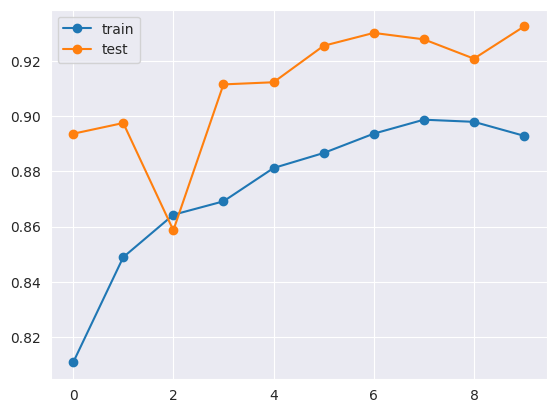

In [58]:
history = np.array(history)
plt.plot(history[:, 1], '-o')
plt.plot(history[:, 2], '-o')
plt.legend(['train', 'test'])

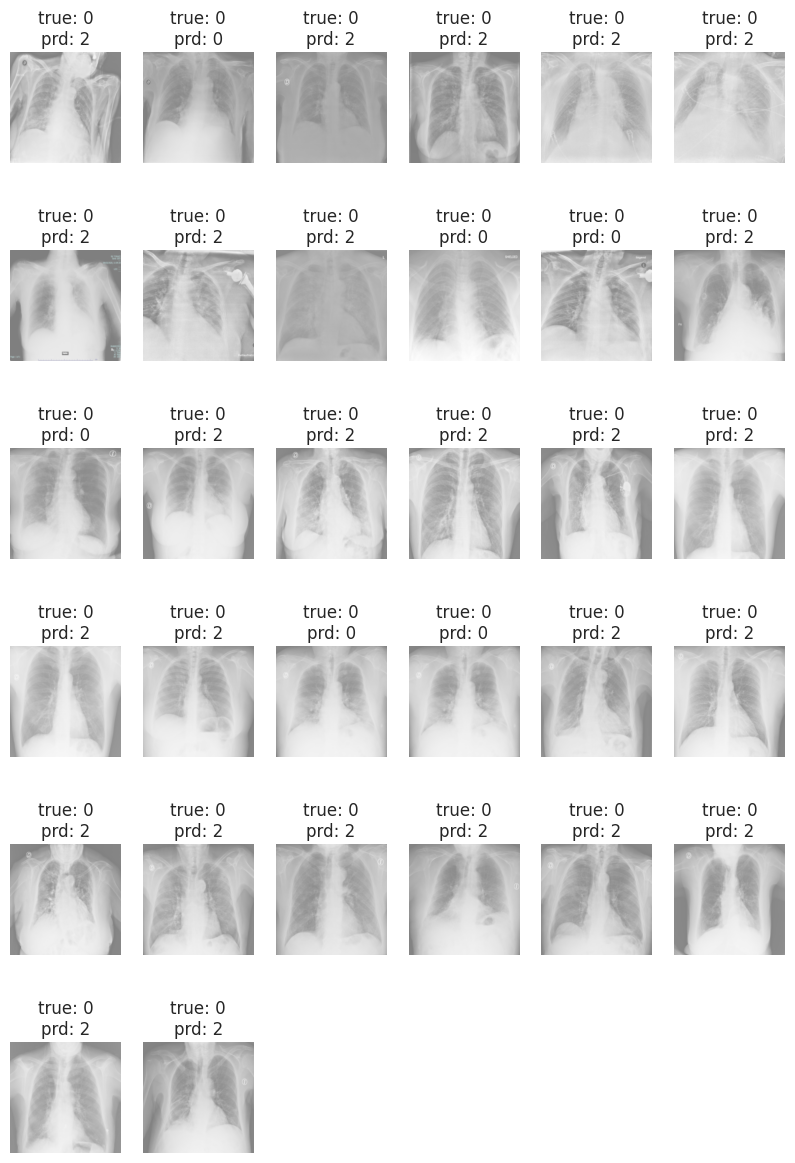

In [59]:
def show_batch(images, labels, net=None):
    prd = None
    if net:
        with torch.no_grad():
            images_gpu = images.to(device)
            prd = net(images_gpu).cpu().numpy()
        # classe mais provavel por amostra
        prd = np.argmax(prd, axis=-1)

    n = len(images)
    grid_size = int(np.ceil(np.sqrt(n)))

    for idx in range(n):
        plt.subplot(grid_size, grid_size, idx + 1)
        img = images[idx].numpy()

        # muda do formato [channels, rows, cols] do torch para [rows, cols, channels]
        img = np.transpose(img, (1, 2, 0))

        img = (img + 1) / 2
        plt.imshow(img, cmap='gray')
        plt.grid(False)
        plt.axis('off')
        title = f'true: {labels[idx].numpy()}'
        if prd is not None:
            title += f'\nprd: {prd[idx]}'
        plt.title(title)

model.eval()

dataiter = iter(test_loader)
images, labels = next(dataiter)

plt.close('all')
plt.figure(figsize=(10, 15))
show_batch(images, labels, model)
plt.show()

In [3]:

from sklearn.metrics import classification_report
true, pred = eval_loop(model=model, dataloader=test_loader_aug, device=device)

print(classification_report(true, pred))

NameError: name 'eval_loop' is not defined